# Quantum data example in Kappen (2018)

This notebook reproduces the example in Section 4 of [Kappen (2018)](https://arxiv.org/abs/1803.11278)

## Setup

In [1]:
import quimb as qu
import matplotlib.pyplot as plt
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
rng = np.random.default_rng(seed=1)

In [3]:
# define number of sites == number of qubits (each site is a 2-level system)
n = 6 ## change this to 10 to reproduce the paper results

## Target state

The quantum state we set up to learn using a QBM is a thermal state (for three different temperatures) from the Hamiltonian of the 1D Heisenberg model with nearest-neighbors interactions, isotropic couplings and zero single-site fields. We report here the full Eq. (13) of the paper:

$$
H=\sum_{i=1}^n \sum_{k=x, y, z} w_i^k \sigma_i^k+\sum_{i=1, j>i}^n \sum_{k=x, y, z} w_{i j}^k \sigma_i^k \sigma_j^k
$$

where $ \sigma_j^k$ are Pauli operators on site $j$ and $n$ is the total number of sites.

The target state is generated with the Hamiltonian where
$$
w_{i j}^{x, y, z}=-1 \text { for nearest neighbors and } w_{i j}^{x, y, z}=0 \text { otherwise and }  w_i^k = 0
$$

### Hamiltonian

For this example, we work under the (simplifying) assumption that each _spin direction_ will have a separate parameter, but that the interaction in a fixed _spin direction_ is isotropic along the spin chain of $n$ sites (we also include periodic boundary conditions). This amounts to the Hamiltonian of the `XYZ` Heisenberg model, but when the `x`, `y`, and `z` couplings are the same, then it is the `XXX` Heisenberg model:

In [7]:
# Fix the parameters of the hamiltonian:
# - 3 parameters for the nearest-neighbors terms
# - 3 parameters for the single-site fields
target_wij_xyz = (-1.0, -1.0, -1.0)
target_wi_xyz = (0.0, 0.0, 0.0)
print(f"Spin interaction used to create target state: {target_wij_xyz}")
print(f"Field value used to create target state: {target_wi_xyz}")

Spin interaction used to create target state: (-1.0, -1.0, -1.0)
Field value used to create target state: (0.0, 0.0, 0.0)


In [17]:
# quimb uses spin_operator instead of pauli operator in the Hamiltonian construction: we need a factor of 2*2 in the couplings
j = (4*j for j in target_wij_xyz)
b = (4*j for j in target_wi_xyz)
target_xxx = qu.ham_heis(n, j, b, cyclic=True, sparse=False)

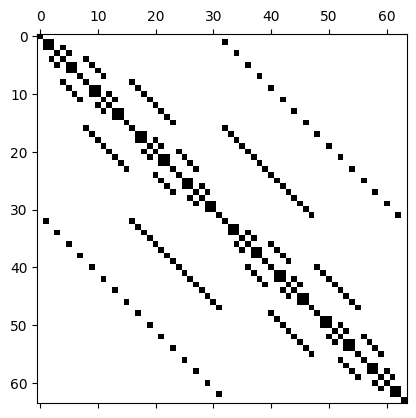

In [18]:
_ = plt.spy(target_xxx.A)

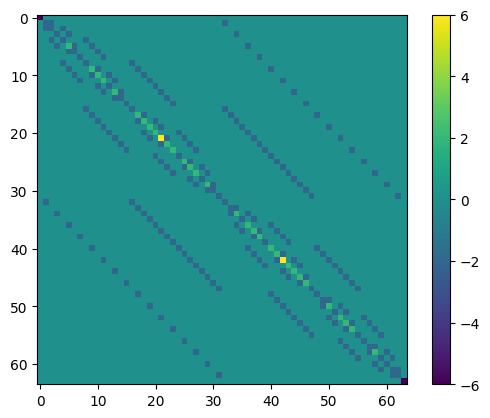

In [19]:
_ = plt.imshow(target_xxx.A, interpolation='nearest')
_ = plt.colorbar()

### Density matrix

The paper generates a density matrix from the `XXX` Hamiltonian at 3 different temperatures $T=1/\beta$, with $\beta = 1, 2, \infty$

In [21]:
target_beta = 1.0
target_eta = qu.thermal_state(target_xxx, target_beta, precomp_func=True)

In [22]:
target_eta_beta1 = target_eta(1.0)

In [23]:
target_eta_beta2 = target_eta(2.0)

The $\beta=\infty$ thermal state is the ground state

In [25]:
gs = qu.groundstate(target_xxx)
target_eta_betainfty = qu.dop(gs)